In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import layers, models

In [5]:
def prepareData():
    allData = pd.read_csv("data/songs_with_genre.csv", index_col=0,header=[0, 1, 2])
    genres = allData["genre_id"]
    genres_index = pd.read_csv("data/genres_no_zeroes.csv", index_col=0)
    genres.columns = range(genres.shape[1])
    allData.drop(columns=["genre_id"], inplace=True)
    data_x = allData
    data_x.columns = range(data_x.shape[1])
    curr = genres_index['genre_index']
    late = genres[0].unique().tolist()
    update_genres = {late[i]:curr[i] for i in range(len(curr))}
    #normalizing
    mu = np.mean(data_x, axis=0)
    sigma = (np.std(data_x, axis=0))
    data_x = (data_x - mu) / sigma
    #Creating the right lables
    genres.columns = range(genres.shape[1])
    genres[0]=genres[0].map(update_genres)
    targets = OneHotEncoder().fit_transform(genres_index).toarray()
    #generes[0] = generes[0] - 1
    data_y = [targets[i - 1] for i in genres[0]]
    genres[0] = data_y
    # print(genres)
    test = genres.copy()
    test.rename(columns={0: "oneHotVector"}, inplace=True)
    # test.shape
    split = pd.DataFrame(test["oneHotVector"].to_list(), columns=range(16))
    split.index = genres.index
    genres = split
    return data_x, genres

In [6]:
data, labels = prepareData()
#data = data.reshape(-1, 1, 518)

x_train, x_rest, y_train, y_rest = train_test_split(data, labels, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_rest, y_rest, train_size=0.5)

In [8]:
CNN = models.Sequential()
#CNN.add(layers.InputLayer(input_shape=(x_train.shape[1],)))
CNN.add(layers.Conv1D(32, 3, activation='relu',input_shape=(518,1),padding='SAME'))
CNN.add(layers.MaxPooling1D(3))
CNN.add(layers.Conv1D(64, 4, activation='relu'))
CNN.add(layers.MaxPooling1D(4))
CNN.add(layers.Flatten())
#CNN.add(layers.Conv1D(128, 5, activation='relu'))
#CNN.add(layers.Dense(256, activation='relu'))
#CNN.add(layers.Dense(128, activation='relu'))
#CNN.add(layers.Dense(6528, activation='relu'))
CNN.add(layers.Dense(16,activation='softmax'))

In [9]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 518, 32)           128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 172, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 169, 64)           8256      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2688)              0         
                                                                 
 dense_1 (Dense)             (None, 16)               

In [11]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',patience=10,verbose=1),tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=10,verbose=1)]
CNN.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [12]:
training = CNN.fit(x_train,y_train,epochs=100, validation_data=(x_valid,y_valid),batch_size=102,callbacks=callback)

Epoch 1/100
389/389 [==============================] - 13s 32ms/step - loss: 1.4120 - accuracy: 0.5536 - val_loss: 1.2728 - val_accuracy: 0.6030
Epoch 2/100
389/389 [==============================] - 14s 36ms/step - loss: 1.1953 - accuracy: 0.6254 - val_loss: 1.1957 - val_accuracy: 0.6298
Epoch 3/100
389/389 [==============================] - 14s 37ms/step - loss: 1.1253 - accuracy: 0.6448 - val_loss: 1.1313 - val_accuracy: 0.6474
Epoch 4/100
389/389 [==============================] - 14s 36ms/step - loss: 1.0736 - accuracy: 0.6576 - val_loss: 1.1260 - val_accuracy: 0.6464
Epoch 5/100
389/389 [==============================] - 14s 35ms/step - loss: 1.0273 - accuracy: 0.6702 - val_loss: 1.0897 - val_accuracy: 0.6579
Epoch 6/100
389/389 [==============================] - 16s 40ms/step - loss: 0.9910 - accuracy: 0.6795 - val_loss: 1.0978 - val_accuracy: 0.6573
Epoch 7/100
389/389 [==============================] - 16s 41ms/step - loss: 0.9515 - accuracy: 0.6906 - val_loss: 1.1299 - val_ac

In [13]:
x_train.shape

(39678, 518)

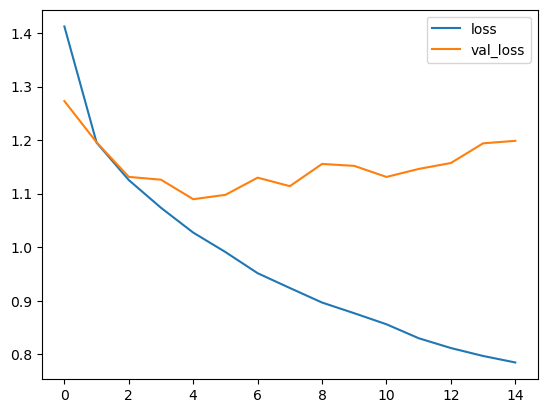

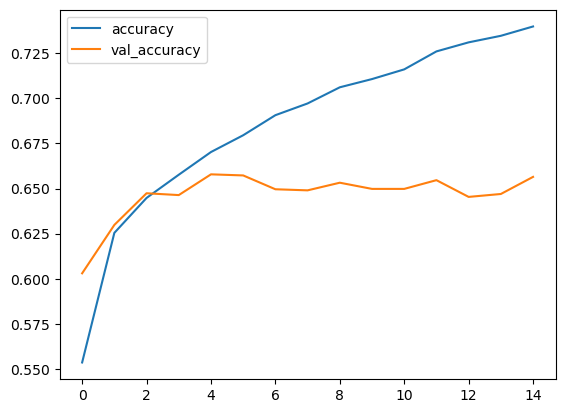

In [14]:
metrics_df = pd.DataFrame(training.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();# The semicolon prevents certain matplotlib items from being printed.

In [15]:
print(training.history)

{'loss': [1.412034511566162, 1.195273518562317, 1.1253260374069214, 1.0735948085784912, 1.027316927909851, 0.9910496473312378, 0.9515478610992432, 0.9239242076873779, 0.8967762589454651, 0.8768325448036194, 0.8562189340591431, 0.8301831483840942, 0.8118565082550049, 0.7970585823059082, 0.7849183678627014], 'accuracy': [0.5536317229270935, 0.6254347562789917, 0.6447905898094177, 0.6576440334320068, 0.6702202558517456, 0.6795201301574707, 0.6906346082687378, 0.6971369385719299, 0.7060839533805847, 0.7106456756591797, 0.7160139083862305, 0.7259690761566162, 0.7309844493865967, 0.7346136569976807, 0.7397802472114563], 'val_loss': [1.272814393043518, 1.1957111358642578, 1.1312850713729858, 1.126039743423462, 1.0896621942520142, 1.0977880954742432, 1.1298834085464478, 1.1139882802963257, 1.155465006828308, 1.1518676280975342, 1.1311835050582886, 1.1461200714111328, 1.1572142839431763, 1.193947434425354, 1.1986024379730225], 'val_accuracy': [0.6030241847038269, 0.6298387050628662, 0.647379040

In [16]:
y_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
track_id,,,,,,,,,,,,,,,,
120781,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52985,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82763,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152229,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test_loss, test_acc = CNN.evaluate(x_test,y_test)

155/155 [==============================] - 1s 4ms/step - loss: 1.1991 - accuracy: 0.6524


In [ ]:
test_acc